<a href="https://colab.research.google.com/github/Ashishkumar-21/Ashishkumar-21/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Data Collection and Analysis

customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
#Checking for missing value
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#Choosing the annual income and spending column'

X = customer_data.iloc[:,[3,4]].values

In [5]:
#Now choosing the correct number of clusters using WCSS -> Within cluster sum of squares

#Elbow mwthods

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init= 12, random_state=21)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

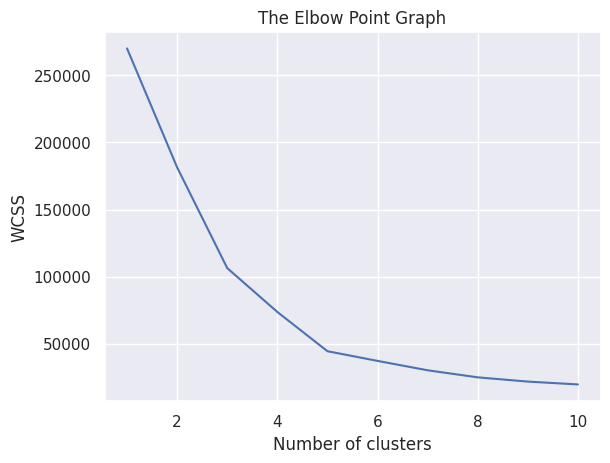

In [6]:
#Plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#Optimum number of cluter = 5

In [10]:
#Training the Model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#Return the label for each data points based on their cluster
Y = kmeans.fit_predict(X)
Y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

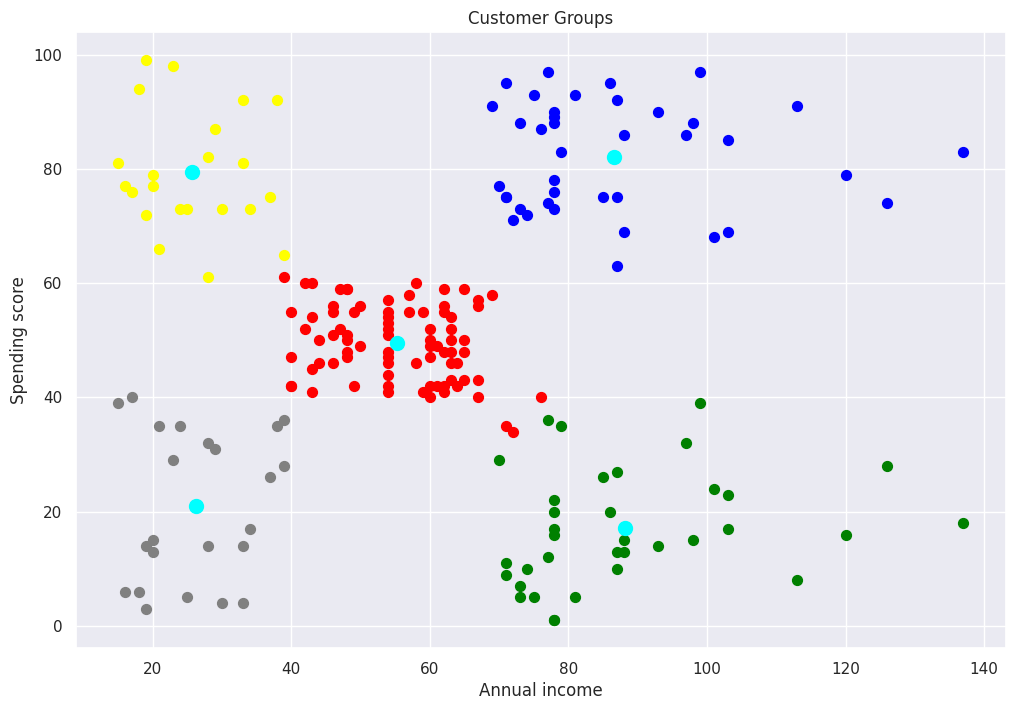

In [15]:
#Visualizing all the clustur
#plotting all clusters'

plt.figure(figsize=(12,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1],s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1],s=50, c='grey', label='Cluster 5')

#plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending score')

plt.show()